# 可视化视差图并且测试图片数据格式

In [ ]:
dir_path = '/media/ljh/data/carla_pothole2/2023_04_25/roll0/base03/disparity_left/'
import os
import numpy as np
import cv2

def visualize_npy_file(file_path):
    data = np.load(file_path)
    print(data.dtype)
    normalized_data = cv2.normalize(data, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    if len(normalized_data.shape) == 2:
        # colored_data = cv2.applyColorMap(normalized_data, cv2.COLORMAP_JET)
        cv2.imshow('Visualization of npy file', normalized_data)
    else:
        if normalized_data.shape[2] == 3 or normalized_data.shape[2] == 4:
            normalized_data = cv2.cvtColor(normalized_data, cv2.COLOR_BGR2RGB)
        cv2.imshow('Visualization of npy file', normalized_data)

    cv2.waitKey(0)

folder_path = '/media/ljh/data/carla_pothole2/2023_04_25/roll0/base03/disparity_left/'
npy_files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

for npy_file in npy_files:
    file_path = os.path.join(folder_path, npy_file)
    visualize_npy_file(file_path)

cv2.destroyAllWindows()


# 检测数据集结构以及样本个数

In [4]:
import os

def count_gt_images(folder_path):
    gt_count = 0
    for file in os.listdir(folder_path):
        if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg'):
            gt_count += 1
    return gt_count

def analyze_dataset(folder_path, level=0):
    subfolders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    total_gt_images = 0

    if not subfolders:
        if os.path.basename(folder_path) == 'rgb_front_left':
            gt_count = count_gt_images(folder_path)
            total_gt_images += gt_count
            print(f"{'  ' * level} └─ {os.path.basename(folder_path)}: {gt_count} 个 rgb 图片")
    else:
        print(f"{'  ' * level} └─ {os.path.basename(folder_path)}")
        for subfolder in subfolders:
            subfolder_path = os.path.join(folder_path, subfolder)
            total_gt_images += analyze_dataset(subfolder_path, level + 1)

    return total_gt_images

dataset_folder_path = '/media/ljh/data/carla_v2/testing'
total_gt_images = analyze_dataset(dataset_folder_path)
print(f"\n所有子文件夹共有 {total_gt_images} 个 rgb 图片")


 └─ testing
   └─ Tiled_V2
     └─ ClearNight
       └─ roll0
         └─ base05
           └─ rgb_front_left: 595 个 rgb 图片
     └─ ClearNoon
       └─ roll0
         └─ base05
           └─ rgb_front_left: 550 个 rgb 图片
     └─ ClearSunset
       └─ roll0
         └─ base05
           └─ rgb_front_left: 462 个 rgb 图片
     └─ WetCloudyNight
       └─ roll0
         └─ base05
           └─ rgb_front_left: 501 个 rgb 图片
     └─ WetCloudyNoon
       └─ roll0
         └─ base05
           └─ rgb_front_left: 531 个 rgb 图片
     └─ WetCloudySunset
       └─ roll0
         └─ base05
           └─ rgb_front_left: 462 个 rgb 图片
   └─ Tiled_v2
     └─ ClearNight
       └─ roll0
         └─ base05
           └─ rgb_front_left: 227 个 rgb 图片
     └─ ClearNoon
       └─ roll0
         └─ base05
           └─ rgb_front_left: 223 个 rgb 图片
     └─ ClearSunset
       └─ roll0
         └─ base05
           └─ rgb_front_left: 208 个 rgb 图片
     └─ WetCloudyNight
       └─ roll0
         └─ base05
           └─ r

### 数据集划分大致应为：training:validation:testing == 6:1:3
### 因此roll-05，roll-10,roll-15,roll0,roll05[base03,06] 一共7042当做训练集
### roll05[base09,12,15] 一共1053当做验证集
### roll10,roll15 一共3250当做测试集

## 手动划分完数据集之后，验证划分是否匹配：

In [ ]:
import os

def count_gt_images(folder_path):
    gt_count = 0
    for file in os.listdir(folder_path):
        if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg'):
            gt_count += 1
    return gt_count

def analyze_dataset(folder_path, level=0):
    subfolders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    total_gt_images = 0

    if not subfolders:
        if os.path.basename(folder_path) == 'rgb_front_left':
            gt_count = count_gt_images(folder_path)
            total_gt_images += gt_count
            print(f"{'  ' * level} └─ {os.path.basename(folder_path)}: {gt_count} 个 rgb 图片")
    else:
        print(f"{'  ' * level} └─ {os.path.basename(folder_path)}")
        for subfolder in subfolders:
            subfolder_path = os.path.join(folder_path, subfolder)
            total_gt_images += analyze_dataset(subfolder_path, level + 1)

    return total_gt_images

dataset_folder_path = '/media/ljh/data/carla_pothole2/carla'
subsets_list = [f for f in os.listdir(dataset_folder_path)]
train_path, test_path, valid_path = None, None, None

for name in subsets_list:
    if 'train' in name.lower():
        train_path = os.path.join(dataset_folder_path, name)
    elif 'val' in name.lower():
        valid_path = os.path.join(dataset_folder_path, name)
    elif 'test' in name.lower():
        test_path = os.path.join(dataset_folder_path, name)

assert train_path is not None, "未找到训练集文件夹"
assert test_path is not None, "未找到测试集文件夹"
assert valid_path is not None, "未找到验证集文件夹"

training_image_count = analyze_dataset(train_path)
test_image_count = analyze_dataset(test_path)
valid_image_count = analyze_dataset(valid_path)

print(f"\n训练集共有 {training_image_count} 个 rgb 图片")
print(f"\n测试集共有 {test_image_count} 个 rgb 图片")
print(f"\n验证集共有 {valid_image_count} 个 rgb 图片")

## 读取kitti_road的tiff格式的depth，normal可视化

In [ ]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import cv2


# 读取 depth,normal 文件
depth_file = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/kitti_road/training/lidar_depth_2/um_000000.png'
depth_data = cv2.imread(depth_file)
disp_file = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/kitti_road/training/disp_2/um_000000.tiff'
disp_data = tiff.imread(disp_file)
normal_file1 = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/kitti_road/training/d2nt/um_000000.npy'
normal_data1 = np.load(normal_file1)
normal1 = (normal_data1 + 1) / 2
normal1 = np.transpose(normal1, (1, 2, 0))
normal_file2 = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/kitti_road/training/d2ntv2/um_000000.npy'
normal_data2 = np.load(normal_file2)
normal2 = (normal_data2 + 1) / 2
normal2 = np.transpose(normal2, (1, 2, 0))
normal_file3 = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/kitti_road/training/3f2n/um_000000.npy'
normal_data3 = np.load(normal_file3)
normal3 = (normal_data3 + 1) / 2
normal3 = np.transpose(normal3, (1, 2, 0))
# print('normal.shape:', normal.shape, normal.dtype)
# 创建子图
fig, axes = plt.subplots(5, 1, figsize=(18, 12))

axes[0].imshow(depth_data, cmap='inferno')  # 如果是彩色图像，删除 'cmap' 参数
axes[0].set_title('depth Image')
axes[0].axis('off')

axes[1].imshow(normal1)  # 如果是彩色图像，删除 'cmap' 参数
axes[1].set_title('normal1 Image')
axes[1].axis('off')

axes[2].imshow(normal2)  # 如果是彩色图像，删除 'cmap' 参数
axes[2].set_title('normal2 Image')
axes[2].axis('off')

axes[3].imshow(normal3)  # 如果是彩色图像，删除 'cmap' 参数
axes[3].set_title('normal3 Image')
axes[3].axis('off')

axes[4].imshow(disp_data)  # 如果是彩色图像，删除 'cmap' 参数
axes[4].set_title('disp Image')
axes[4].axis('off')
# 显示图像
plt.show()

## 读取carla数据集的depth，dispartiy，rgb和gt并且可视化

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


# 读取 depth,normal 文件
# depth_file = '/media/ljh/data/carla_pothole2/carla/training/roll0/base03/depth_left/23_849448266.jpeg'
# depth_data = cv2.imread(depth_file)[:,:,:]

# tmp = np.matmul(depth_data, np.array([65536, 256, 1]))
# tmp = np.array(tmp / tmp.max() * 256, dtype=np.int8)
# dp = np.array([tmp, tmp, tmp])
# # depth_data = dp.swapaxes(0,2).swapaxes(0,1)
# # dp = dp.swapaxes(1,2)
# depth_data = tmp
#
# # depth_data = cv2.cvtColor(dp, cv2.COLOR_BGR2RGB)
# print('depth.shape:', depth_data.shape, depth_data.dtype)

disparity_file = '/media/ljh/data/carla_v2/training/WetRoad1/ClearNoon/roll0/base05/disparity_left/21_35316994.npy'
disparity_data = np.load(disparity_file)
print('disparity.shape:', disparity_data.shape, disparity_data.dtype)
print('disparity.min:', np.min(disparity_data), np.max(disparity_data))
# depth_data = 0.3 * 640 / disparity_data
# depth_data


#
# rgb_file = '/media/ljh/data/carla_pothole2/carla/training/roll0/base03/rgb_front_left/23_849448266.jpeg'
# rgb_data = cv2.imread(rgb_file)
# rgb_data = cv2.cvtColor(rgb_data, cv2.COLOR_BGR2RGB)
# print('rgb.shape:', rgb_data.shape, rgb_data.dtype)
#
# gt_file = '/media/ljh/data/carla_pothole2/carla/training/roll0/base03/semantic_segmentation_left/23_849448266.jpeg'
# gt_data = cv2.imread(gt_file)
# gt_data = cv2.cvtColor(gt_data, cv2.COLOR_BGR2RGB)
# print('gt.shape:', gt_data.shape, gt_data.dtype)
# 创建子图
fig, axes = plt.subplots(4, 1, figsize=(18, 12))

# axes[0].imshow(depth_data)  # 如果是彩色图像，删除 'cmap' 参数
# axes[0].set_title('depth Image')
# axes[0].axis('off')

axes[1].imshow(disparity_data, cmap='inferno')  # 如果是彩色图像，删除 'cmap' 参数
axes[1].set_title('disparity Image')
axes[1].axis('off')

axes[2].imshow(rgb_data)  # 如果是彩色图像，删除 'cmap' 参数
axes[2].set_title('rgb Image')
axes[2].axis('off')

axes[3].imshow(gt_data)  # 如果是彩色图像，删除 'cmap' 参数
axes[3].set_title('rgb Image')
axes[3].axis('off')
# 显示图像
plt.show()

In [ ]:
disparity_file = '/media/ljh/data/carla_pothole2/carla/training/roll0/base03/disparity_left/23_849448266.npy'
disparity_data = np.load(disparity_file) / 10
print('disparity.shape:', disparity_data.shape, disparity_data.dtype)

depth = 0.3 * 640 / disparity_data
depth.min()

## 查看gt图片中各个类别所对应的RGB颜色数值

In [4]:
import cv2
import numpy as np

# 读取语义分割图像
seg_image_file = '/home/ljh/Desktop/Workspace/mmsegmentation/aachen_000000_000019_gtFine_labelTrainIds.png'
seg_image = cv2.imread(seg_image_file, cv2.IMREAD_UNCHANGED)
print(seg_image.shape,seg_image.dtype)
# # 转换为RGB格式
# # seg_image_rgb = cv2.cvtColor(seg_image, cv2.COLOR_BGR2RGB)
seg_image_rgb = seg_image
#
# # 获取所有独特颜色
unique_colors = np.unique(seg_image_rgb.reshape(-1), axis=0)
print(unique_colors.shape)
# # 输出独特颜色
print("Unique labels (RGB):")
for color in unique_colors:
    print(color)


(1024, 2048) uint8
(13,)
Unique labels (RGB):
0
1
2
5
7
8
9
10
11
12
13
18
255


In [ ]:
tmp = seg_image.reshape(-1, seg_image.shape[2])
np.sum(tmp[:,0]==128)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


# 读取 depth,normal 文件
disparity_file = '/media/ljh/data/carla_pothole2/carla/training/roll0/base03/disparity_left/23_849448266.npy'
disparity_org = np.load(disparity_file)
disparity = disparity_org / 10
print('disparity_org:', disparity_org, disparity_org.dtype)
print('disparity:', disparity, disparity.dtype)

depth_data = 0.3 * 640 / disparity
print('depth_data:', depth_data, depth_data.dtype)
# depth_data
# 创建子图
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

axes[0].imshow(depth_data)  # 如果是彩色图像，删除 'cmap' 参数
axes[0].set_title('depth Image')
axes[0].axis('off')

axes[1].imshow(disparity, cmap='inferno')  # 如果是彩色图像，删除 'cmap' 参数
axes[1].set_title('disparity Image')
axes[1].axis('off')

# 显示图像
plt.show()

## pothole-600数据集部分

In [ ]:
import os

def rename_images(dataset_path, file_extension):
    count = 0
    for subs in os.listdir(dataset_path):
        print(subs)
        # 列出子文件夹中的所有文件
        subset_path = os.path.join(dataset_path, subs)
        print(subset_path)
        # 对于子文件夹中的每个文件
        for subdir in os.listdir(subset_path):
            files_path = os.path.join(subset_path, subdir)
            files = os.listdir(files_path)
            # 检查文件是否为指定的图片格式（如：.png）
            for index, file in enumerate(files):
                if file.endswith(file_extension):
                    # 构建新文件名
                    new_file_name = f"{(count + index):05}.{file_extension}"
                # 获取旧文件和新文件的完整路径
                    old_file_path = os.path.join(files_path, file)
                    new_file_path = os.path.join(files_path, new_file_name)

                # 重命名文件
                    os.rename(old_file_path, new_file_path)
                    print(f"Renamed '{old_file_path}' to '{new_file_path}'")

        dir_name_list = os.listdir(subset_path)
        dir_path = os.path.join(subset_path, dir_name_list[0])
        imgs = os.listdir(dir_path)
        count += len(imgs)

### 设置数据集文件夹路径
dataset_path = "/home/ljh/Desktop/Workspace/custom_dataset/pothole600"
# 设置图片文件扩展名
file_extension = "png"
rename_images(dataset_path, file_extension)


## pothole数据集label，tdisp，rgb可视化

tdisp: [[[255  17   0]
  [255  13   0]
  [255  10   0]
  ...
  [255  22   0]
  [255  20   0]
  [255  17   0]]

 [[255  18   0]
  [255  16   0]
  [255  13   0]
  ...
  [255  24   0]
  [255  22   0]
  [255  19   0]]

 [[255  20   0]
  [255  18   0]
  [255  16   0]
  ...
  [255  25   0]
  [255  24   0]
  [255  21   0]]

 ...

 [[255   2   0]
  [255   4   0]
  [255   5   0]
  ...
  [226   0   0]
  [231   0   0]
  [230   0   0]]

 [[255   3   0]
  [255   4   0]
  [255   5   0]
  ...
  [226   0   0]
  [232   0   0]
  [232   0   0]]

 [[255   6   0]
  [255   6   0]
  [255   7   0]
  ...
  [224   0   0]
  [233   0   0]
  [234   0   0]]] (400, 400, 3) uint8
rgb_value of labels: [[  0   0   0]
 [255 255 255]]


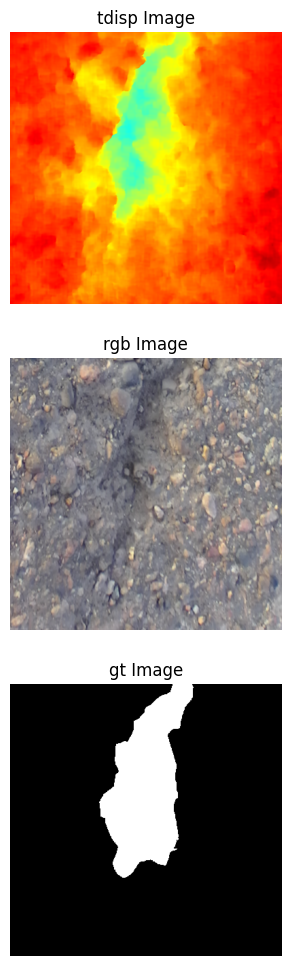

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


# 读取 depth,normal 文件
tdisp_file = '/home/ljh/Desktop/Workspace/custom_dataset/pothole600/training/tdisp/00180.png'
tdisp_data = cv2.imread(tdisp_file)
tdisp_data = cv2.cvtColor(tdisp_data, cv2.COLOR_BGR2RGB)
print('tdisp:', tdisp_data, tdisp_data.shape, tdisp_data.dtype)
rgb_file = '/home/ljh/Desktop/Workspace/custom_dataset/pothole600/training/rgb/00180.png'
rgb_data = cv2.imread(rgb_file)
# print('rgb:', rgb_data, rgb_data.shape, rgb_data.dtype)
rgb_data = cv2.cvtColor(rgb_data, cv2.COLOR_BGR2RGB)
gt_file = '/home/ljh/Desktop/Workspace/custom_dataset/pothole600/training/label/00180.png'
gt_data = cv2.imread(gt_file)
# print('gt:', gt_data, gt_data.shape, gt_data.dtype)
gt_data = cv2.cvtColor(gt_data, cv2.COLOR_BGR2RGB)

unique_colors = np.unique(gt_data.reshape(-1, gt_data.shape[2]), axis=0)
print('rgb_value of labels:', unique_colors)
# 创建子图
fig, axes = plt.subplots(3, 1, figsize=(18, 12))

axes[0].imshow(tdisp_data)  # 如果是彩色图像，删除 'cmap' 参数
axes[0].set_title('tdisp Image')
axes[0].axis('off')

axes[1].imshow(rgb_data)  # 如果是彩色图像，删除 'cmap' 参数
axes[1].set_title('rgb Image')
axes[1].axis('off')

axes[2].imshow(gt_data)  # 如果是彩色图像，删除 'cmap' 参数
axes[2].set_title('gt Image')
axes[2].axis('off')
# 显示图像
plt.show()

## 得出坑洞部分的label=(255, 255, 255)

In [ ]:
import numpy as np

a = np.random.random((400, 400, 3))
print(a.shape)
a = cv2.resize(a, (600, 600))
print(a.shape)


## kitti 数据集将normal从npy转为png的脚本

In [ ]:
import os
import sys
import numpy as np
import tifffile
from tqdm import tqdm
from pathlib import Path
import cv2
import imageio
imageio.plugins.freeimage.download()


root_path = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/kitti_road/training'
for root, dirs, files in os.walk(root_path):
    for name in tqdm(files):
        if 'd2ntv1' in root and name.endswith('.npy'):  # Only process .npy files in directories.
            sne_path = os.path.join(root, name)
            sne = np.load(sne_path)
            sne_np = sne.astype(np.float32)
            sne_np = (sne_np + 1) / 2
            sne_np = np.transpose(sne_np, (1, 2, 0))
            sne_store = (sne_np * 65535).astype(np.uint16)
            sne_save_path = Path(sne_path.replace('d2ntv1', 'sne'))
            sne_save_path.parent.mkdir(parents=True, exist_ok=True)
            sne_save_path = Path(str(sne_save_path).replace('.npy', '.png'))
            # 使用 imageio 保存 sne_store 为 PNG 图像
            imageio.imwrite(sne_save_path, sne_store, format='png-FI')
            print(f'finished processing {sne_save_path}')
print('all finished!')

465750
(1024, 2048)


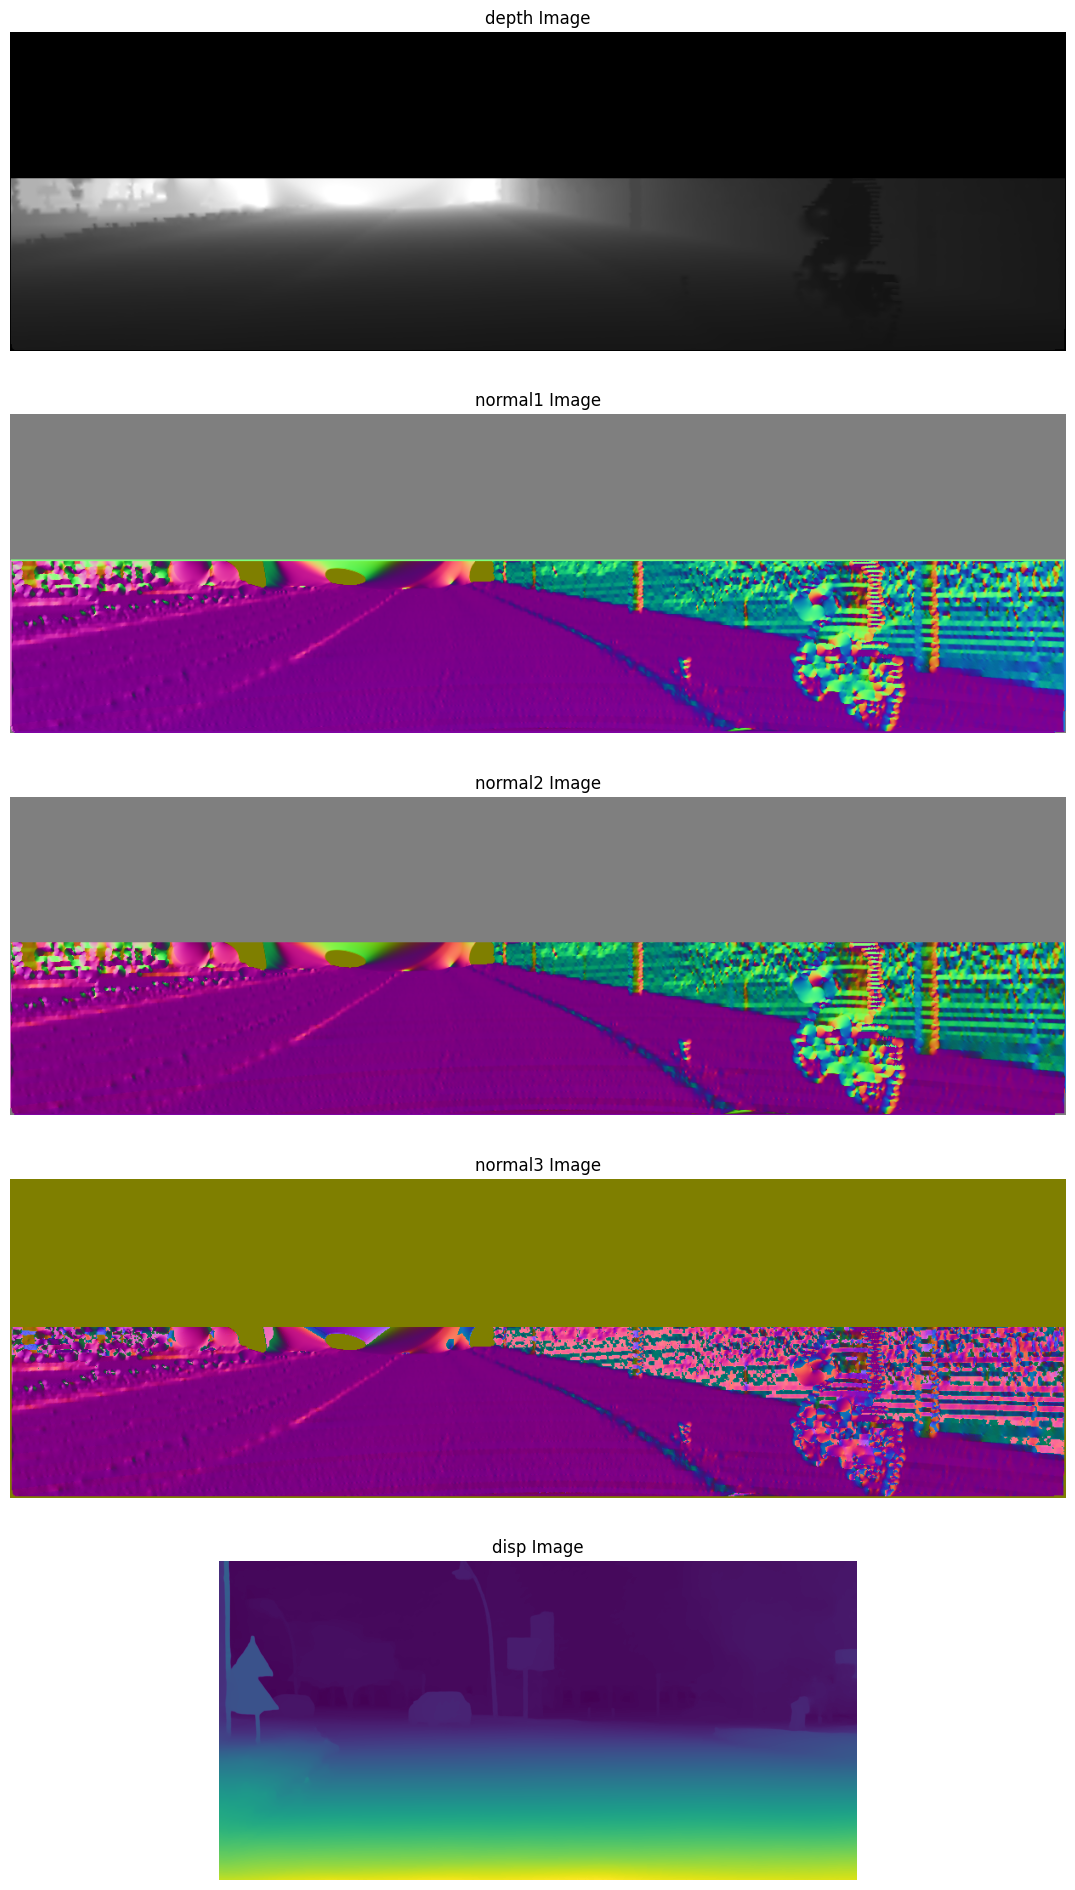

In [6]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import cv2


# 读取 depth,normal 文件
depth_file = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/kitti_road/training/lidar_depth_2/um_000000.png'
depth_data = cv2.imread(depth_file)
print((depth_data[:,:,0]==depth_data[:,:,1]).sum())
disp_file = '/media/ljh/data/cityscapesxxx/left_disp/train/aachen/aachen_000000_000019_disp.tiff'
disp_data = tiff.imread(disp_file)
print(disp_data.shape)
normal_file1 = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/kitti_road/training/d2ntv1/um_000000.npy'
normal_data1 = np.load(normal_file1)
normal1 = (normal_data1 + 1) / 2
normal1 = np.transpose(normal1, (1, 2, 0))
normal_file2 = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/kitti_road/training/d2ntv2/um_000000.npy'
normal_data2 = np.load(normal_file2)
normal2 = (normal_data2 + 1) / 2
normal2 = np.transpose(normal2, (1, 2, 0))
normal_file3 = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/kitti_road/training/3f2n/um_000000.npy'
normal_data3 = np.load(normal_file3)
normal3 = (normal_data3 + 1) / 2
normal3 = np.transpose(normal3, (1, 2, 0))
# print('normal.shape:', normal.shape, normal.dtype)
# 创建子图
fig, axes = plt.subplots(5, 1, figsize=(36, 24))

axes[0].imshow(depth_data, cmap='inferno')  # 如果是彩色图像，删除 'cmap' 参数
axes[0].set_title('depth Image')
axes[0].axis('off')

axes[1].imshow(normal1)  # 如果是彩色图像，删除 'cmap' 参数
axes[1].set_title('normal1 Image')
axes[1].axis('off')

axes[2].imshow(normal2)  # 如果是彩色图像，删除 'cmap' 参数
axes[2].set_title('normal2 Image')
axes[2].axis('off')

axes[3].imshow(normal3)  # 如果是彩色图像，删除 'cmap' 参数
axes[3].set_title('normal3 Image')
axes[3].axis('off')

axes[4].imshow(disp_data)  # 如果是彩色图像，删除 'cmap' 参数
axes[4].set_title('disp Image')
axes[4].axis('off')
# 显示图像
plt.show()

(375, 1242)
uint16
65535 0
(375, 1242) 69.234985 2.6347158
float32 0.9999997 0.0


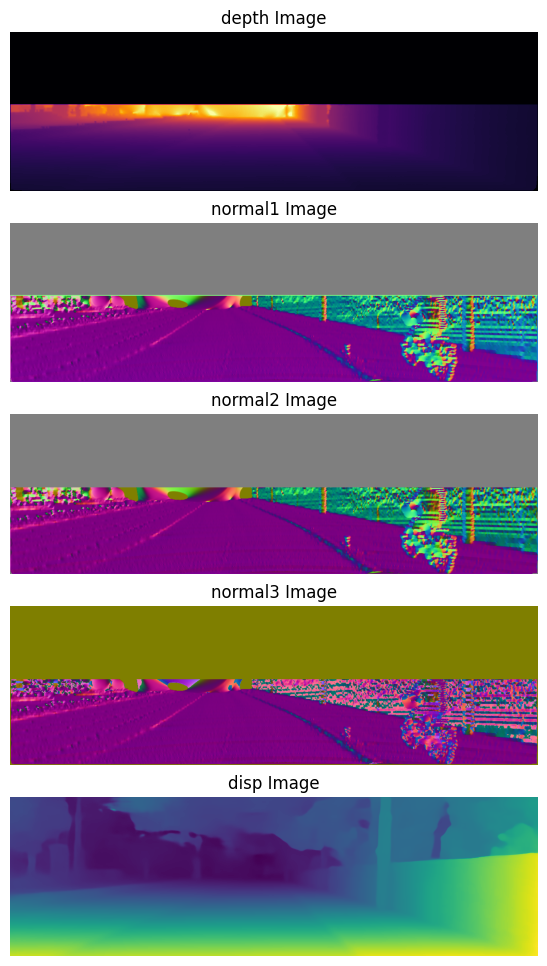

In [17]:
import os
import glob

gt_folder = '/home/ljh/Desktop/Workspace/custom_dataset/kitti/KITTI/gt_image_2/validation'

# 使用glob找到所有的.png文件
for gt_file in glob.glob(os.path.join(gt_folder, '*.png')):
    # 检查文件名中是否包含'_road'
    if '_road' in os.path.basename(gt_file):
        # 创建新的文件名，将'_road'替换为''
        new_file = gt_file.replace('_road', '')
        # 重命名文件
        os.rename(gt_file, new_file)
        print(f'finished rename {new_file}')
print('all finished')

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


normal = cv2.imread('/media/ljh/data/cityscapesxxx/gtFine/train/aachen/aachen_000000_000019_gtFine_labelIds.png', cv2.IMREAD_UNCHANGED)
print(normal.shape, normal.dtype, np.min(normal), np.max(normal))
cv2.imshow('img', normal)
cv2.waitKey()
cv2.destroyAllWindows()

(1024, 2048) uint8 0 33


                     name |  id | trainId |       category | categoryId | hasInstances | ignoreInEval|        color
    --------------------------------------------------------------------------------------------------
                unlabeled |   0 |     255 |           void |          0 |            0 |            1 |         (0, 0, 0)
              ego vehicle |   1 |     255 |           void |          0 |            0 |            1 |         (0, 0, 0)
     rectification border |   2 |     255 |           void |          0 |            0 |            1 |         (0, 0, 0)
               out of roi |   3 |     255 |           void |          0 |            0 |            1 |         (0, 0, 0)
                   static |   4 |     255 |           void |          0 |            0 |            1 |         (0, 0, 0)
                  dynamic |   5 |     255 |           void |          0 |            0 |            1 |      (111, 74, 0)
                   ground |   6 |     255 |           void |          0 |            0 |            1 |       (81, 0, 81)
                     road |   7 |       0 |           flat |          1 |            0 |            0 |    (128, 64, 128)
                 sidewalk |   8 |       1 |           flat |          1 |            0 |            0 |    (244, 35, 232)
                  parking |   9 |     255 |           flat |          1 |            0 |            1 |   (250, 170, 160)
               rail track |  10 |     255 |           flat |          1 |            0 |            1 |   (230, 150, 140)
                 building |  11 |       2 |   construction |          2 |            0 |            0 |      (70, 70, 70)
                     wall |  12 |       3 |   construction |          2 |            0 |            0 |   (102, 102, 156)
                    fence |  13 |       4 |   construction |          2 |            0 |            0 |   (190, 153, 153)
               guard rail |  14 |     255 |   construction |          2 |            0 |            1 |   (180, 165, 180)
                   bridge |  15 |     255 |   construction |          2 |            0 |            1 |   (150, 100, 100)
                   tunnel |  16 |     255 |   construction |          2 |            0 |            1 |    (150, 120, 90)
                     pole |  17 |       5 |         object |          3 |            0 |            0 |   (153, 153, 153)
                polegroup |  18 |     255 |         object |          3 |            0 |            1 |   (153, 153, 153)
            traffic light |  19 |       6 |         object |          3 |            0 |            0 |    (250, 170, 30)
             traffic sign |  20 |       7 |         object |          3 |            0 |            0 |     (220, 220, 0)
               vegetation |  21 |       8 |         nature |          4 |            0 |            0 |    (107, 142, 35)
                  terrain |  22 |       9 |         nature |          4 |            0 |            0 |   (152, 251, 152)
                      sky |  23 |      10 |            sky |          5 |            0 |            0 |    (70, 130, 180)
                   person |  24 |      11 |          human |          6 |            1 |            0 |     (220, 20, 60)
                    rider |  25 |      12 |          human |          6 |            1 |            0 |       (255, 0, 0)
                      car |  26 |      13 |        vehicle |          7 |            1 |            0 |       (0, 0, 142)
                    truck |  27 |      14 |        vehicle |          7 |            1 |            0 |        (0, 0, 70)
                      bus |  28 |      15 |        vehicle |          7 |            1 |            0 |      (0, 60, 100)
                  caravan |  29 |     255 |        vehicle |          7 |            1 |            1 |        (0, 0, 90)
                  trailer |  30 |     255 |        vehicle |          7 |            1 |            1 |       (0, 0, 110)
                    train |  31 |      16 |        vehicle |          7 |            1 |            0 |      (0, 80, 100)
               motorcycle |  32 |      17 |        vehicle |          7 |            1 |            0 |       (0, 0, 230)
                  bicycle |  33 |      18 |        vehicle |          7 |            1 |            0 |     (119, 11, 32)
            license plate |  -1 |      -1 |        vehicle |          7 |            0 |            1 |       (0, 0, 142)